In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

In [23]:
data = pd.read_csv('data/german_credit_data.csv')
data = data.drop(columns=["Name", "ID"])
data = data.fillna('missing')

In [24]:
for column in ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]:
    one_hot = pd.get_dummies(data[column], prefix=column)

    data = data.drop(column, axis=1)
    data = data.join(one_hot)

In [25]:
data.head()

,Age,Credit amount,Duration,Risk,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1169,6,good,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,5951,48,bad,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,2096,12,good,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,7882,42,good,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,53,4870,24,bad,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
for column in ['Age', 'Credit amount', 'Duration']:
    data[column] = (data[column] - data[column].mean())/data[column].std()

In [27]:
X, y = data.drop("Risk", axis=1), data['Risk']
y    = (y == 'good').astype(int)

In [28]:
from sklearn.model_selection import train_test_split, KFold, cross_validate # to split the data
from sklearn.metrics import recall_score, precision_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


In [10]:
# to feed the random state
seed = 7

# prepare models
models = [
    ('Logistic\nRegression', LogisticRegression()),
    ('Linear\nDiscriminant', LinearDiscriminantAnalysis()),
    ('K-Nearest\nNeighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(gamma='auto')),
    ('XGB', XGBClassifier())
]

# evaluate each model in turn
results = []
names = []
scoring = "precision", "recall", "roc_auc"

kfold = KFold(n_splits=20)
for name, model in models:
    cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    

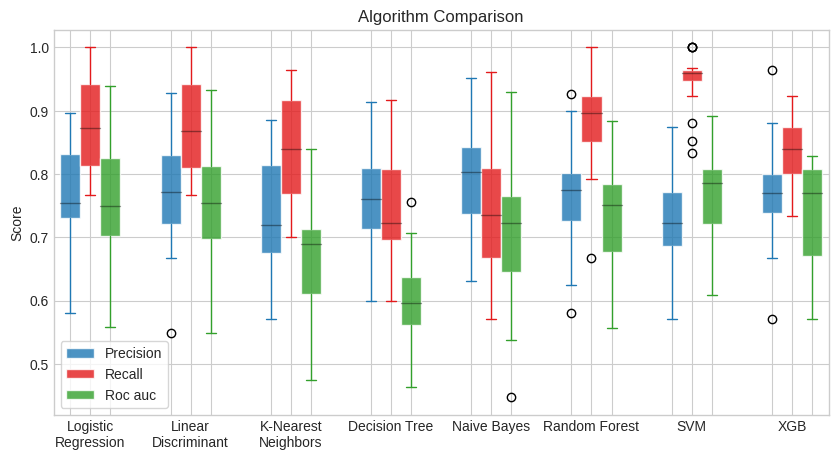

In [11]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Algorithm Comparison')
boxes = plt.boxplot(np.array([model[metric] for model in results for metric in [f'test_{metric}' for metric in scoring]]).T, positions=[[i+0.4, i, i-0.4][i%3] for i in range(24)], widths=0.6, patch_artist=True)

ax.xaxis.set_major_formatter(lambda x, i : names[i//3] if i%3==1 else '')

for i in range(24):
    color = ["#1f78b4", "#e31a1c", "#33a02c"][i%3]

    boxes['boxes'][i].set_color((1, 1, 1, 0.4))
    boxes['boxes'][i].set(facecolor=color, alpha=0.8)
    boxes['medians'][i].set_color((0, 0, 0, 0.4))
    boxes['whiskers'][2*i].set_color(color)
    boxes['whiskers'][2*i+1].set_color(color)
    boxes['caps'][2*i].set_color(color)
    boxes['caps'][2*i+1].set_color(color)
    boxes['fliers'][i].set_color(color)
    boxes['fliers'][i].set_color(color)

for i in range(3):
    boxes['boxes'][i].set_label(scoring[i].replace('_', ' ').capitalize())


plt.ylabel("Score")
plt.legend(frameon=True)
plt.savefig("plots/comparison.svg", transparent=True)
plt.show()

In [30]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(X_test)

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(fbeta_score(y_test, y_pred, beta=1/5))

0.7804878048780488
0.898876404494382
0.7844616254950029


In [34]:
correlation

Checking account_little       -0.258333
Purpose_education             -0.049085
Saving accounts_little        -0.161007
Checking account_moderate     -0.119581
Housing_free                  -0.081556
Duration                      -0.214927
Saving accounts_moderate      -0.022255
Purpose_repairs               -0.020828
Sex_female                    -0.075493
Job_3                         -0.040559
Purpose_domestic appliances   -0.008016
Credit amount                 -0.154739
Job_2                          0.013559
Purpose_car                   -0.022621
Housing_rent                  -0.092785
Purpose_business              -0.036129
Job_1                          0.021822
Saving accounts_quite rich     0.070954
Purpose_vacation/others       -0.028058
Saving accounts_missing        0.129238
Sex_male                       0.075493
Job_0                         -0.005951
Checking account_rich          0.044009
Purpose_furniture/equipment   -0.020971
Age                            0.091127


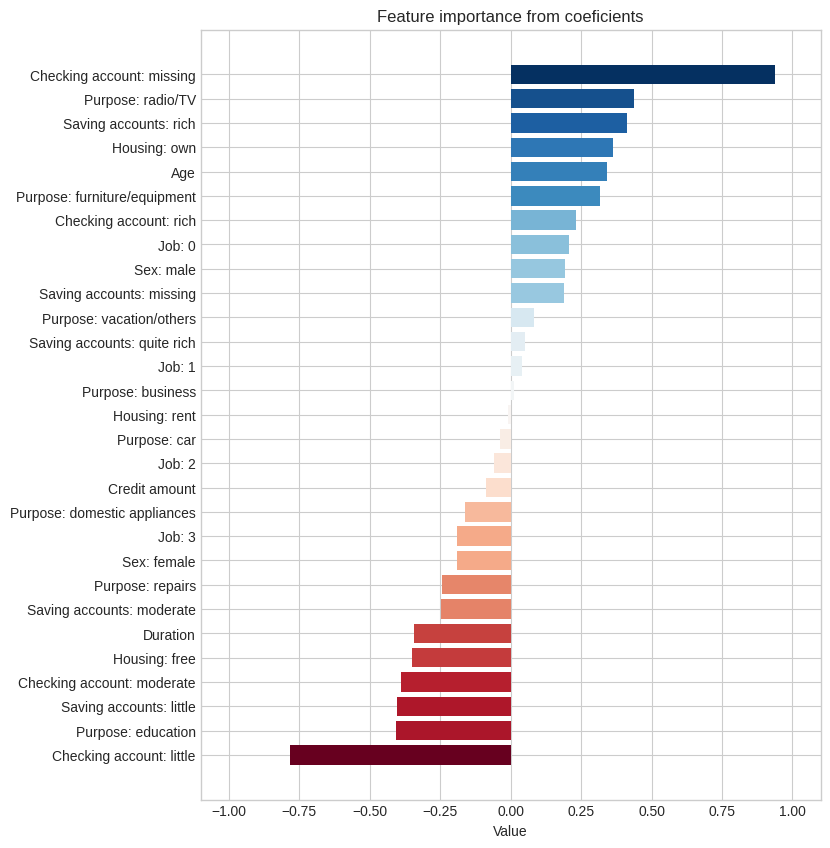

In [57]:
fig, ax = plt.subplots(figsize=(8, 10))

idxs = np.argsort(model.coef_[0])

coefs = model.coef_[0][idxs]
correlation = X.corrwith(y)[idxs]

n = coefs.shape[0]

bars = plt.barh(np.arange(n), coefs, color=plt.get_cmap("RdBu")((coefs + 0.5)))

plt.title("Feature importance from coeficients")
plt.xlim(-1.1,1.1)
plt.yticks(range(model.coef_.shape[1]), labels=np.array([column.replace('_', ': ') for column in X.columns])[idxs])
plt.xlabel("Value")
plt.savefig("plots/importance.svg", transparent=True, bbox_inches="tight")
plt.show()

In [15]:
X["Predicted"] = model.predict(X)

In [16]:
X["Job"] = X["Job_1"] + 2*X["Job_2"]+3*X["Job_3"]

In [17]:
X

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Predicted,Job
0,2.765073,-0.744759,-1.235859,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,2
1,-1.190808,0.949342,2.247070,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2
2,1.182721,-0.416354,-0.738298,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,0.831087,1.633430,1.749509,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,2
4,1.534354,0.566380,0.256825,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399632,-0.543890,-0.738298,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
996,0.391544,0.207509,0.754386,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,3
997,0.215727,-0.874066,-0.738298,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,2
998,-1.102900,-0.505275,1.998289,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,2
